这一节我们使用 sklearn 中提供的 SVM 方法来解决一个简单的二分类问题。sklearn 自带了一个鸢尾花的数据集，这个数据集是 Fisher 在 1936 年收集整理的，是一类多重变量分析的数据集，数据集共包含 150 条数据记录，分为 3 类，每类 50 个数据，每条数据包含 4 个属性。可通过花萼长度，花萼宽度，花瓣长度，花瓣宽度 4 个属性预测鸢尾花卉属于（Setosa，Versicolour，Virginica）三个种类中的哪一类。

由于我们想使用 SVM 解决二分类问题，所以这里我们只取鸢尾花的两种类型，每种类型只取两个特征：

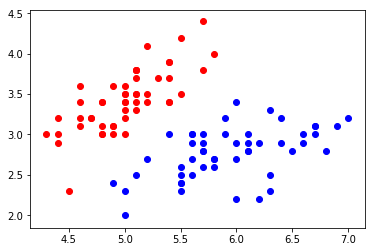

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris();

X = iris.data
y = iris.target

X = X[y < 2, :2]
y = y[y < 2]

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue')
plt.show()

图中可以看出数据非常明显的分为两类。通过 sklearn 中提供的 `LinearSVC` 类，可以非常方便的训练出模型，这里的参数 C 取一个很大的数字，这样得到的接近于硬间隔支持向量机。我们输入两个测试数据：`(6,2)` 和 `(4,3)` 得到的结果正好是 1 和 0。

In [5]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1e9)
svc.fit(X, y)
results = svc.predict([[6,2], [4, 3]])
print(results)

[1 0]


/home/aneasystone/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


不过这里我们看到了警告信息：`Liblinear failed to converge, increase the number of iterations`，这句话的意思是算法没有达到收敛，需要增加迭代次数，sklearn 默认的迭代次数是 1000，我们将其加到 40000 才收敛：

In [6]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1e9, max_iter=40000)
svc.fit(X, y)
results = svc.predict([[6,2], [4, 3]])
print(results)

[1 0]


迭代次数越多很显然算法性能就越低，解决这个问题的令一个办法是数据归一化，使用 `preprocessing` 模块提供的 `scale` 方法将数据移到靠近中心的位置，让其符合正态分布，可以看出不用增加迭代次数算法也可以很快收敛：

[1 0]


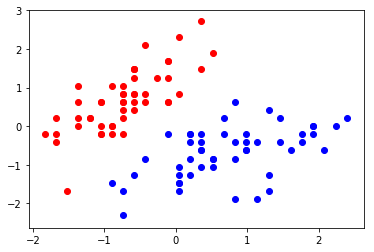

In [7]:
from sklearn.svm import LinearSVC
from sklearn import preprocessing

X_scaled = preprocessing.scale(X)
svc = LinearSVC(C=1e9)
svc.fit(X_scaled, y)
results = svc.predict(preprocessing.scale([[6,2], [4, 3]]))
print(results)

plt.scatter(X_scaled[y == 0, 0], X_scaled[y == 0, 1], color='red')
plt.scatter(X_scaled[y == 1, 0], X_scaled[y == 1, 1], color='blue')
plt.show()

最后我们在图中画出划分超平面，也就是决策边界，决策边界为一条直线：

$$
w_1x + w_2y + b = 0
$$

这里的 $w$ 为特征系数，可以通过 `svc.coef_` 取得，$b$ 为截距，可以通过 `intercept_` 取得：

In [8]:
print('w = ', svc.coef_)
print('b = ', svc.intercept_)

w =  [[ 4.03244052 -2.50699934]]
b =  [0.92733476]


从而得到直线方程：

$$
y = -\frac{w_1x+b}{w_2}
$$

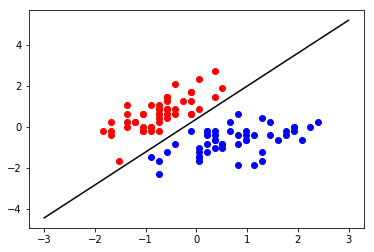

In [15]:
def plot_svc_decision_boundary(model):
    w = model.coef_[0]
    b = model.intercept_[0]
    x = np.linspace(-3, 3, 200)
    y = - (w[0]*x+b) / w[1]
    plt.plot(x, y, color='black')

plot_svc_decision_boundary(svc)
plt.scatter(X_scaled[y == 0, 0], X_scaled[y == 0, 1], color='red')
plt.scatter(X_scaled[y == 1, 0], X_scaled[y == 1, 1], color='blue')
plt.show()